In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

In [2]:
data = pd.read_csv("D:\Titan\Projects\Projects\studentDropOutAnalysis\dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\titan\AppData\Local\Temp\ipykernel_18012\3072888077.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv("D:\Titan\Projects\Projects\studentDropOutAnalysis\dataset.csv")


In [3]:
data.head(10)

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   
5               2                12                  1      17   
6               1                 1                  1      12   
7               1                 9                  4      11   
8               1                 1                  3      10   
9               1                 1                  1      10   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   
5                           0                      12            1   
6                           1                       1            1   
7                           1                       1            1   
8                           1                       1           15   
9                           1                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   
5                      22                      27                   10  ...   
6                      13                      28                    8  ...   
7                      22                      27                   10  ...   
8                       1                       1                   10  ...   
9                       1                      14                    5  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   
5                                    0                                    5   
6                                    0                                    8   
7                                    0                                    5   
8                                    0                                    6   
9                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age'}, inplace = True)
data.isnull().sum()/len(data)*100

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance                        0.0
Previous qualification                            0.0
Nationality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder                                0.0
Age                                               0.0
International               

In [6]:
print(data["Target"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [7]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})
print(data["Target"].unique())

[0 2 1]


In [8]:
data.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

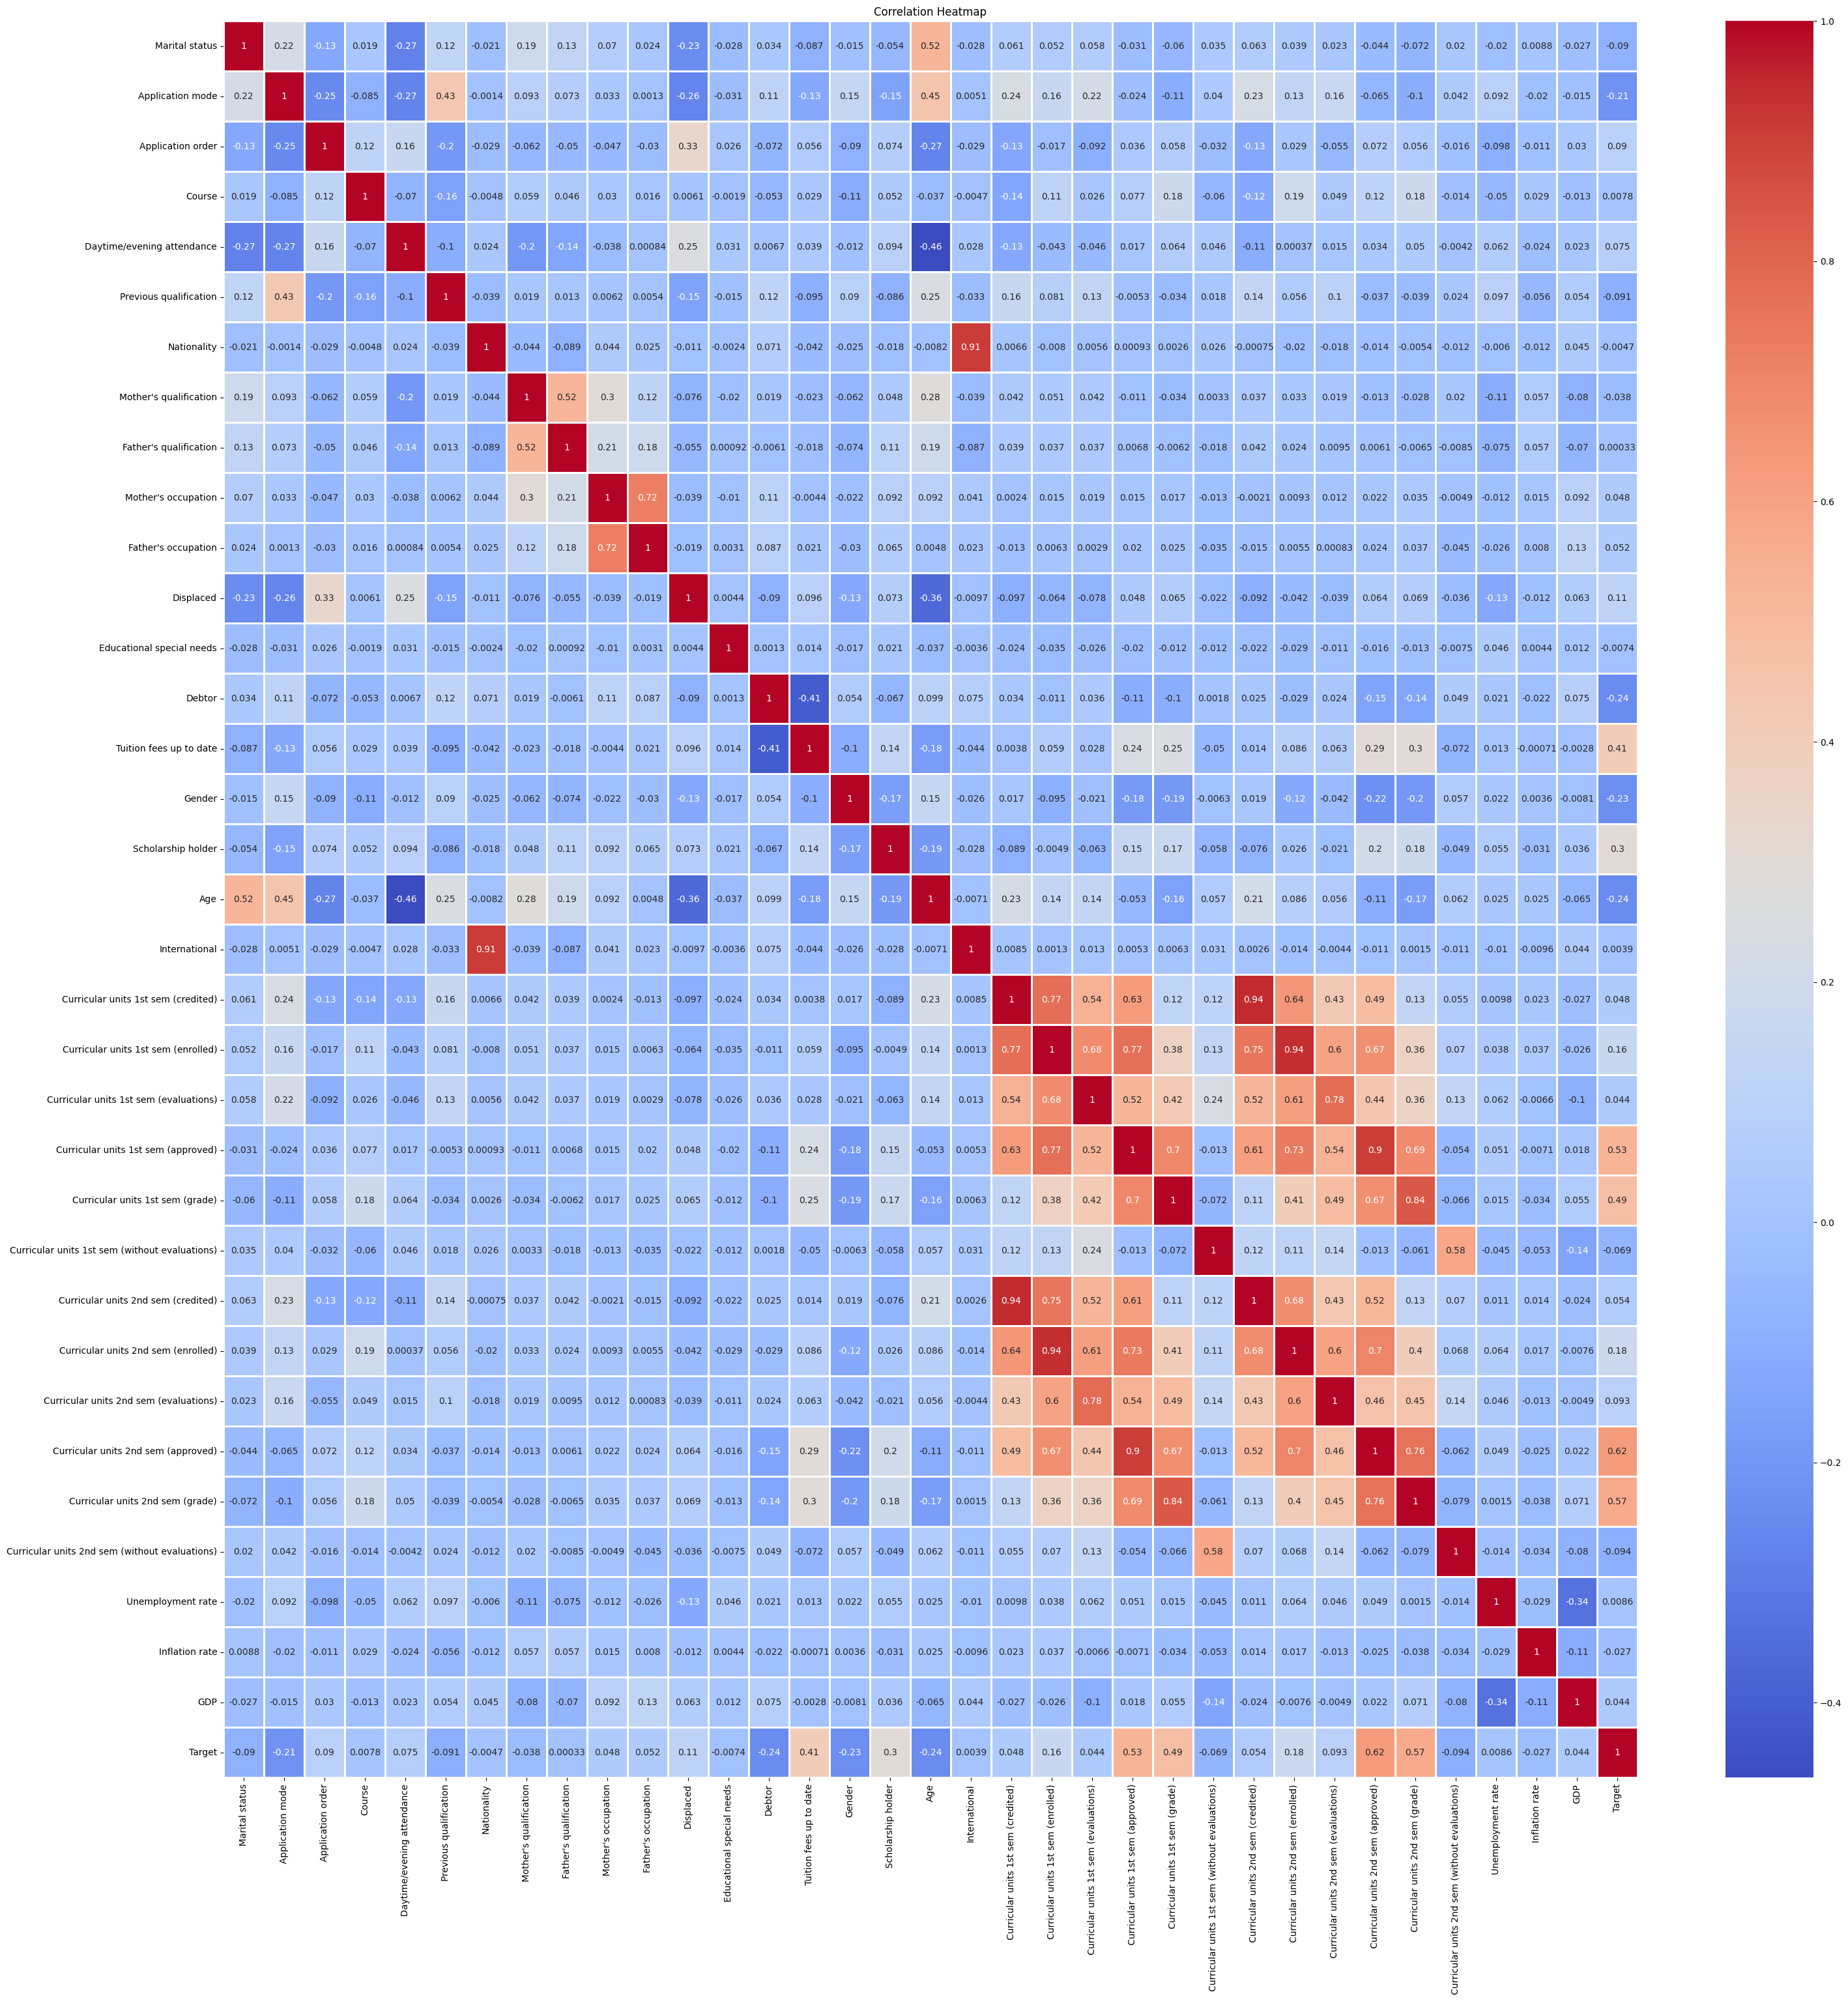

In [9]:
plt.figure(figsize=(35, 35))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
new_data = data.copy()
new_data = new_data.drop(columns=['Nationality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's occupation                             4424 non-null   int64  
 7   Father's occupation                             4424 non-null   int64  
 8   Displaced                                       4424 non-null   int64  
 9   Debtor                                   

In [11]:
new_data['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

In [12]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Sample data for demonstration (replace with your actual data)
new_data = pd.DataFrame({
    'Target': ['Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Enrolled', 'Dropout', 'Graduate']
})

# Calculate value counts
x = new_data['Target'].value_counts().index
y = new_data['Target'].value_counts().values

# Create a DataFrame
df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

# Create a pie chart
fig = px.pie(df, names='Target', values='Count_T', title='How many dropouts, enrolled & graduates are there in Target column')

# Customize the pie chart
fig.update_traces(labels=['Graduate', 'Dropout', 'Enrolled'], hole=0.4, textinfo='value+label', pull=[0, 0.2, 0.1])

# Set the renderer (if needed) and show the plot
pio.renderers.default = "notebook"  # Adjust this as needed (e.g., "browser", "colab")
fig.show()


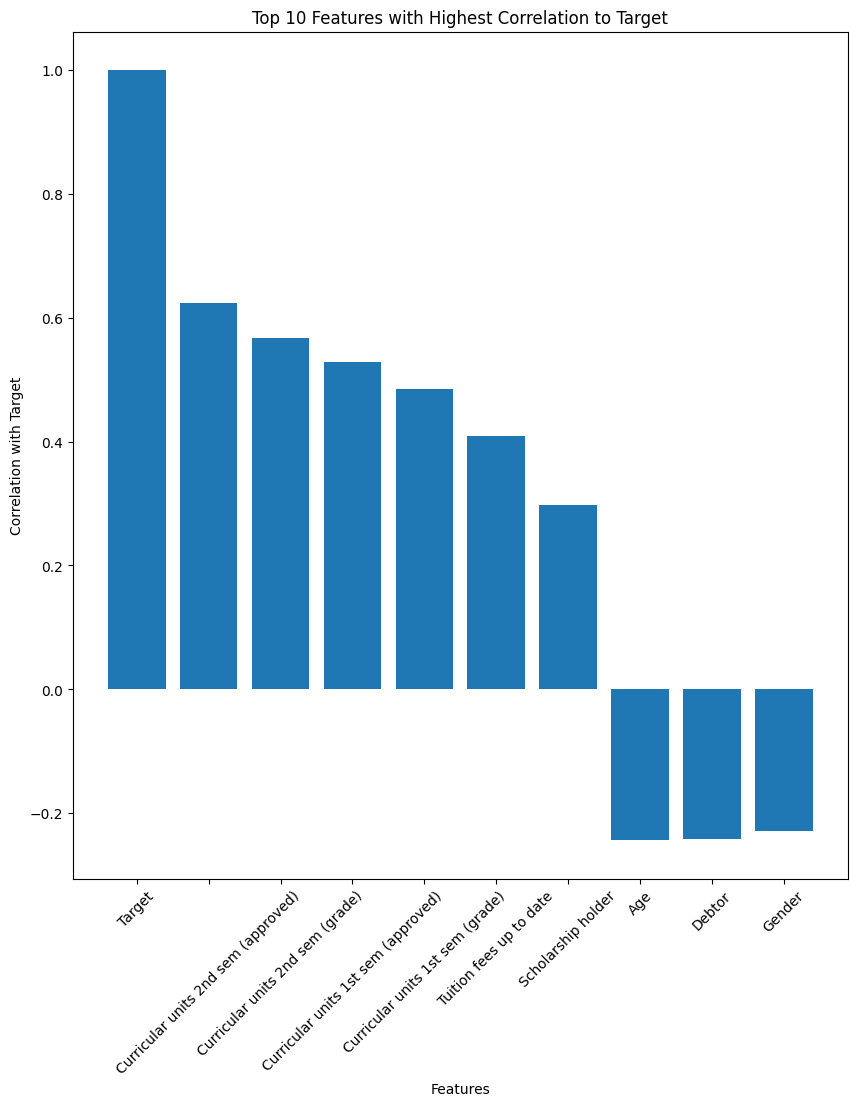

In [13]:
correlations = data.corr()['Target']
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Top 10 Features with Highest Correlation to Target')
plt.xticks(rotation=45)
plt.show()

In [14]:
px.histogram(data['Age'], x='Age',color_discrete_sequence=['lightblue'])

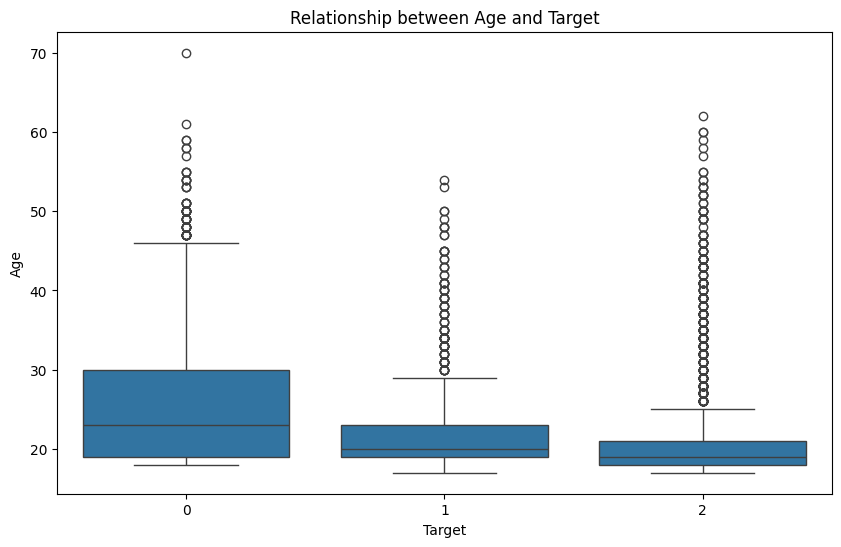

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=data)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Relationship between Age and Target')
plt.show()

In [16]:
X = data.drop('Target', axis=1)
y = data['Target']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.svm import SVC


dtree = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=2)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)
xbc = XGBClassifier(tree_method='hist')
svmmod = SVC(kernel='linear',probability=True)

In [19]:
dtree.fit(X_train,y_train)
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
abc.fit(X_train, y_train)
xbc.fit(X_train, y_train)
svmmod.fit(X_train, y_train)

d:\Titan\Git\StudentDropOutAnalysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Titan\Git\StudentDropOutAnalysis\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



SVC(kernel='linear', probability=True)

In [20]:
y_pred = dtree.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 68.36 %


In [21]:
y_pred = rfc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 79.55 %


In [22]:
y_pred = lr.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 78.64 %


In [23]:
y_pred = knn.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 66.21 %


In [24]:
y_pred = abc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.85 %


In [25]:
y_pred = xbc.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")


Accuracy : 79.89 %


In [26]:
y_pred = svmmod.predict(X_test)
print("Accuracy :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy : 77.29 %


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

# 1. Load Dataset
data = pd.read_csv('dataset.csv')

# 2. Filter Dataset to include only rows where Target is 'Graduate', 'Dropout', or 'Enrolled'
valid_targets = ['Graduate', 'Dropout', 'Enrolled']
data = data[data['Target'].isin(valid_targets)]

# 3. Preprocessing: Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':  # Categorical data
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:  # Numeric data
        data[column].fillna(data[column].median(), inplace=True)

# 4. Encode the target column (Dropout -> 0, Graduate -> 1, Enrolled -> 2)
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])  # This will map the classes correctly

# 5. Split the data into features and target
X = data.drop('Target', axis=1)  # Features
y = data['Target']  # Target

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train a RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 8. Save the trained model to a file
joblib.dump(rf_model, 'graduate_dropout_enrolled_model.pkl')

# 9. Save the label encoder to a file
joblib.dump(label_encoder, 'label_encoder.pkl')

# 10. Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# 11. Test the model with a sample input
sample_input = X_test.iloc[0].values.reshape(1, -1)  # Ensuring correct shape
sample_pred = rf_model.predict(sample_input)

# Convert the predicted numerical output back to the original labels using inverse_transform
human_readable_pred = label_encoder.inverse_transform(sample_pred)
print(f'Sample Prediction: {human_readable_pred[0]}')  # Will print 'Dropout', 'Graduate', or 'Enrolled'


C:\Users\titan\AppData\Local\Temp\ipykernel_20056\3341812318.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\titan\AppData\Local\Temp\ipykernel_20056\3341812318.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

Model Accuracy: 77.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.53      0.32      0.40       151
           2       0.78      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.68       885
weighted avg       0.76      0.77      0.76       885

Sample Prediction: Dropout


d:\Titan\Git\StudentDropOutAnalysis\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
sample_input = X_test.iloc[3].values.reshape(1, -1)  # Ensuring correct shape
sample_pred = rf_model.predict(sample_input)

# Convert the predicted numerical output back to the original labels using inverse_transform
human_readable_pred = label_encoder.inverse_transform(sample_pred)
print(f'Sample Prediction: {human_readable_pred[0]}')  # Will print 'Dropout', 'Graduate', or 'Enrolled'

Sample Prediction: Graduate


d:\Titan\Git\StudentDropOutAnalysis\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
